<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/NLP_006(GRU%2C_LSTM_%26_COnv1D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imdb,info=tfds.load("imdb_reviews", as_supervised=True, with_info=True)
imdb

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDDBAGD/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDDBAGD/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDDBAGD/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [10]:
training=imdb["train"]
testing=imdb["test"]

training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

for sen, lab in training:
  training_sentences.append(sen.numpy().decode("utf8"))
  training_labels.append(lab.numpy())

for sen, lab in testing:
  testing_sentences.append(sen.numpy().decode("utf8"))
  testing_labels.append(lab.numpy())


In [11]:
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [13]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

training_sequence=tokenizer.texts_to_sequences(training_sentences)
testing_sequence=tokenizer.texts_to_sequences(testing_sentences)

pad_training_sequence=tf.keras.preprocessing.sequence.pad_sequences(training_sequence, maxlen=120, truncating="post")
pad_testing_sequence=tf.keras.preprocessing.sequence.pad_sequences(testing_sequence, maxlen=120, truncating="post")

####Graphing Function

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

####Flatten Layer

In [ ]:
model_1=tf.keras.Sequential([tf.keras.layers.Input(shape=(120)),
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=6, activation="relu"),
                             tf.keras.layers.Dense(units=1, activation="sigmoid")])
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model_1.fit(pad_training_sequence,training_labels, epochs=10, validation_data=(pad_testing_sequence,testing_labels))

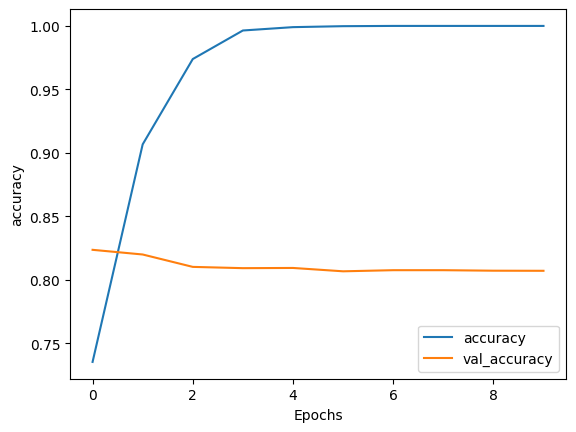

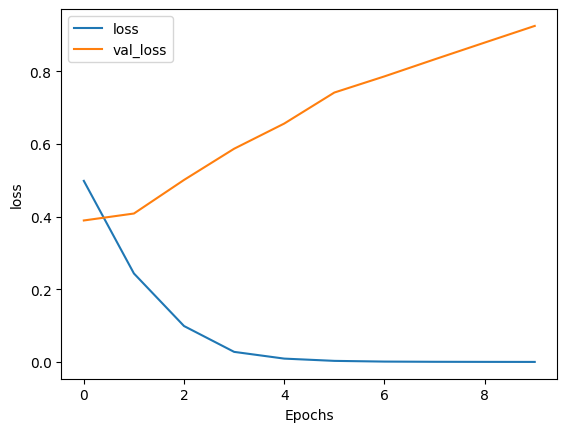

In [16]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

####Conv 1D

In [ ]:
model_1=tf.keras.Sequential([tf.keras.layers.Input(shape=(120)),
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.Conv1D(filters=32, kernel_size=5),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(units=6, activation="relu"),
                             tf.keras.layers.Dense(units=1, activation="sigmoid")])
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model_1.fit(pad_training_sequence,training_labels, epochs=10, validation_data=(pad_testing_sequence,testing_labels))

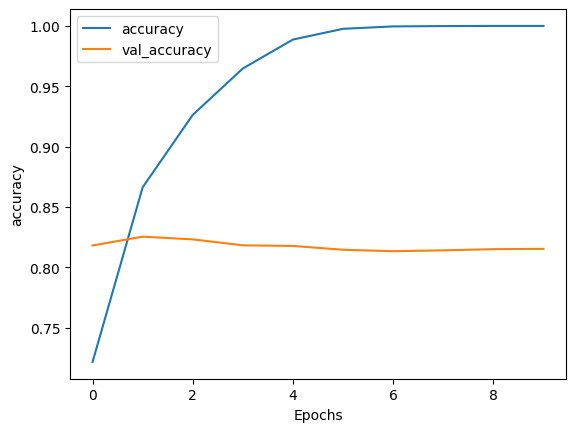

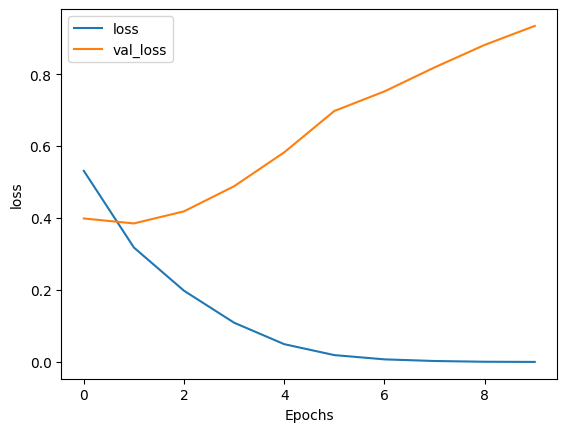

In [18]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

####LSTM

In [19]:
model_1=tf.keras.Sequential([tf.keras.layers.Input(shape=(120)),
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(units=6, activation="relu"),
                             tf.keras.layers.Dense(units=1, activation="sigmoid")])
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model_1.fit(pad_training_sequence,training_labels, epochs=10, validation_data=(pad_testing_sequence,testing_labels), verbose=2)

Epoch 1/10
782/782 - 94s - loss: 0.4721 - accuracy: 0.7681 - val_loss: 0.3923 - val_accuracy: 0.8288 - 94s/epoch - 120ms/step
Epoch 2/10
782/782 - 82s - loss: 0.2932 - accuracy: 0.8828 - val_loss: 0.3965 - val_accuracy: 0.8242 - 82s/epoch - 105ms/step
Epoch 3/10
782/782 - 82s - loss: 0.2311 - accuracy: 0.9114 - val_loss: 0.4577 - val_accuracy: 0.8224 - 82s/epoch - 105ms/step
Epoch 4/10
782/782 - 73s - loss: 0.1827 - accuracy: 0.9337 - val_loss: 0.5038 - val_accuracy: 0.8128 - 73s/epoch - 94ms/step
Epoch 5/10
782/782 - 80s - loss: 0.1408 - accuracy: 0.9498 - val_loss: 0.4848 - val_accuracy: 0.8088 - 80s/epoch - 102ms/step
Epoch 6/10
782/782 - 82s - loss: 0.1084 - accuracy: 0.9620 - val_loss: 0.6273 - val_accuracy: 0.8059 - 82s/epoch - 104ms/step
Epoch 7/10
782/782 - 73s - loss: 0.0822 - accuracy: 0.9720 - val_loss: 0.6694 - val_accuracy: 0.7994 - 73s/epoch - 94ms/step
Epoch 8/10
782/782 - 74s - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.7497 - val_accuracy: 0.7992 - 74s/epoch - 95ms/

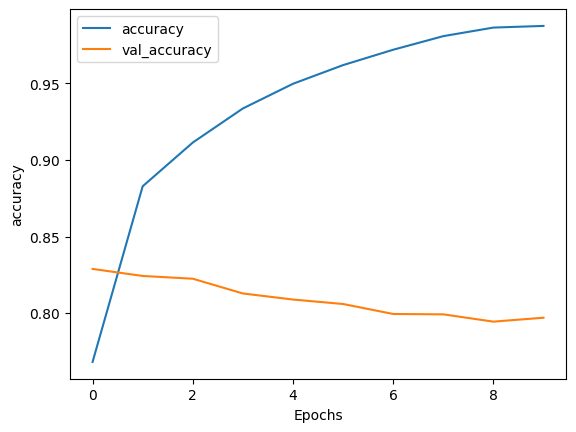

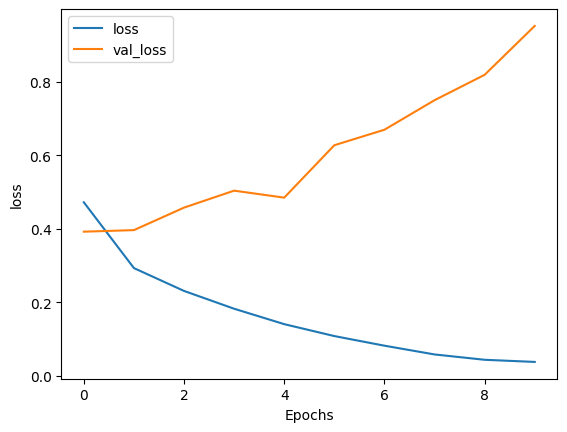

In [20]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

####GRU

In [21]:
model_1=tf.keras.Sequential([tf.keras.layers.Input(shape=(120)),
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
                             tf.keras.layers.Dense(units=6, activation="relu"),
                             tf.keras.layers.Dense(units=1, activation="sigmoid")])
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model_1.fit(pad_training_sequence,training_labels, epochs=10, validation_data=(pad_testing_sequence,testing_labels), verbose=2)

Epoch 1/10
782/782 - 90s - loss: 0.5210 - accuracy: 0.7148 - val_loss: 0.3942 - val_accuracy: 0.8207 - 90s/epoch - 115ms/step
Epoch 2/10
782/782 - 92s - loss: 0.2973 - accuracy: 0.8789 - val_loss: 0.4159 - val_accuracy: 0.8180 - 92s/epoch - 117ms/step
Epoch 3/10
782/782 - 84s - loss: 0.2270 - accuracy: 0.9116 - val_loss: 0.4234 - val_accuracy: 0.8141 - 84s/epoch - 108ms/step
Epoch 4/10
782/782 - 84s - loss: 0.1697 - accuracy: 0.9388 - val_loss: 0.5253 - val_accuracy: 0.8063 - 84s/epoch - 107ms/step
Epoch 5/10
782/782 - 84s - loss: 0.1266 - accuracy: 0.9560 - val_loss: 0.6249 - val_accuracy: 0.7821 - 84s/epoch - 107ms/step
Epoch 6/10
782/782 - 92s - loss: 0.0921 - accuracy: 0.9677 - val_loss: 0.6615 - val_accuracy: 0.7912 - 92s/epoch - 117ms/step
Epoch 7/10
782/782 - 84s - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.8340 - val_accuracy: 0.8030 - 84s/epoch - 107ms/step
Epoch 8/10
782/782 - 84s - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.9778 - val_accuracy: 0.7704 - 84s/epoch - 108

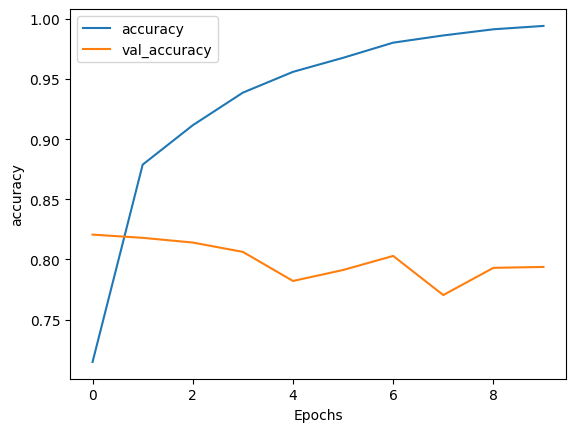

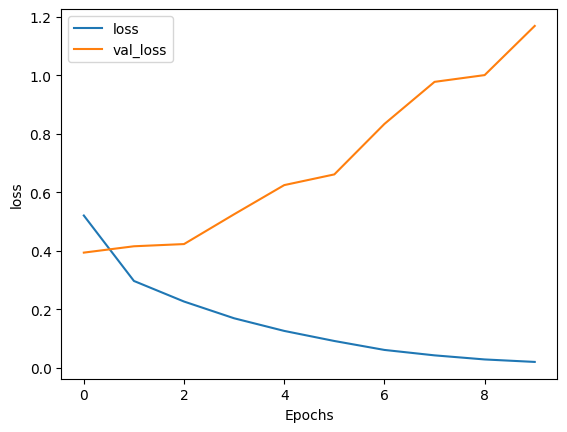

In [22]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")